In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point,Daily
from datetime import datetime

In [2]:
start=datetime(2020,1,1)
end=datetime(2024,1,1)

Vienna=Point(48.2082, 16.3738)

In [3]:
data=Daily(Vienna,start,end)
data=data.fetch()
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,4.7,1.9,6.2,0.0,NaN,293.0,10.8,44.5,1035.1,NaN
2020-01-02,1.3,-0.7,3.7,0.0,NaN,142.0,4.9,14.8,1032.2,NaN
2020-01-03,-0.7,-2.2,0.8,0.0,NaN,168.0,6.3,16.7,1027.9,NaN
2020-01-04,5.8,0.5,7.8,3.2,NaN,273.0,20.9,72.2,1023.7,NaN
2020-01-05,3.5,1.8,5.4,0.0,NaN,306.0,20.1,66.7,1032.2,NaN


In [4]:
data=data[['tavg','tmin','tmax','prcp','wdir','wspd','wpgt','pres']]
data.head()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
time,,,,,,,,
2020-01-01,4.7,1.9,6.2,0.0,293.0,10.8,44.5,1035.1
2020-01-02,1.3,-0.7,3.7,0.0,142.0,4.9,14.8,1032.2
2020-01-03,-0.7,-2.2,0.8,0.0,168.0,6.3,16.7,1027.9
2020-01-04,5.8,0.5,7.8,3.2,273.0,20.9,72.2,1023.7
2020-01-05,3.5,1.8,5.4,0.0,306.0,20.1,66.7,1032.2


In [5]:
data.shape

(1462, 8)

In [6]:
data.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='time', ylabel='tavg'>

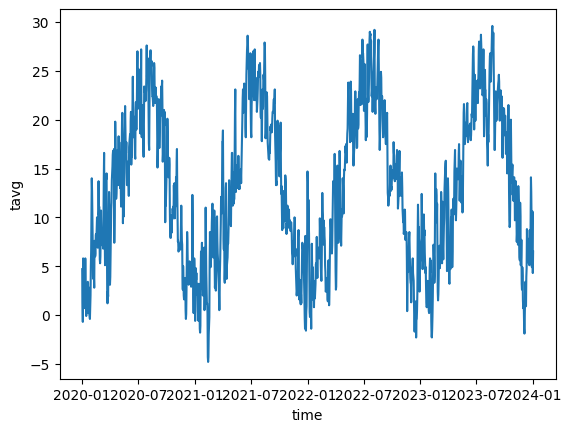

In [8]:
sns.lineplot(data=data,x=data.index,y='tavg')

<Axes: xlabel='time', ylabel='pres'>

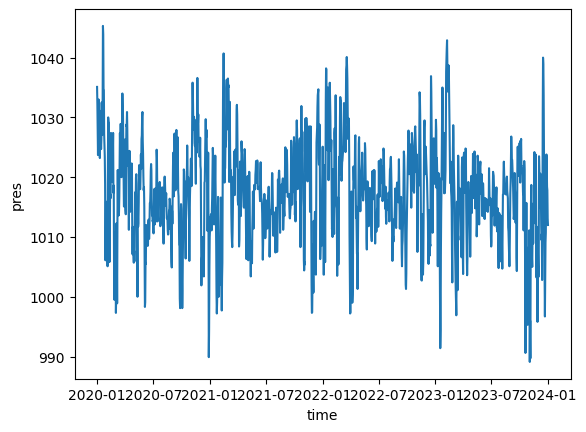

In [15]:

sns.lineplot(data=data,x=data.index,y='pres')

<Axes: xlabel='time', ylabel='wspd'>

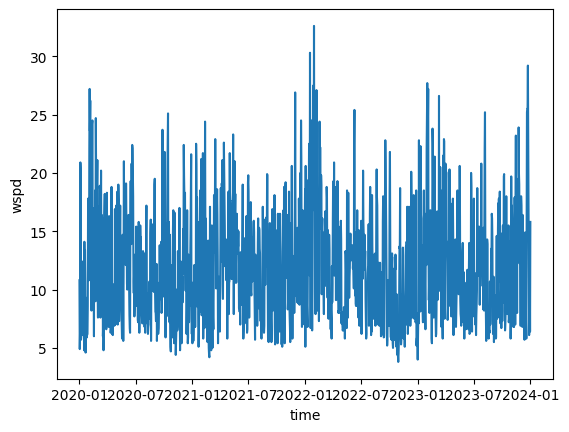

In [28]:
sns.lineplot(data=data,x=data.index,y='wspd')

<Axes: ylabel='pres'>

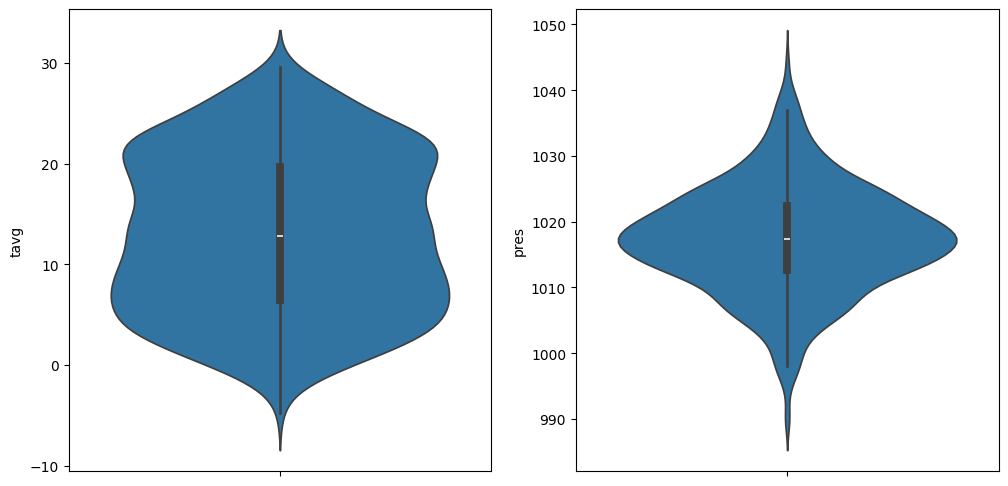

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot on the first subplot
sns.violinplot(y='tavg', data=data, ax=axes[0])

# Plot the second boxplot on the second subplot
sns.violinplot(y='pres', data=data, ax=axes[1])

<Axes: ylabel='wspd'>

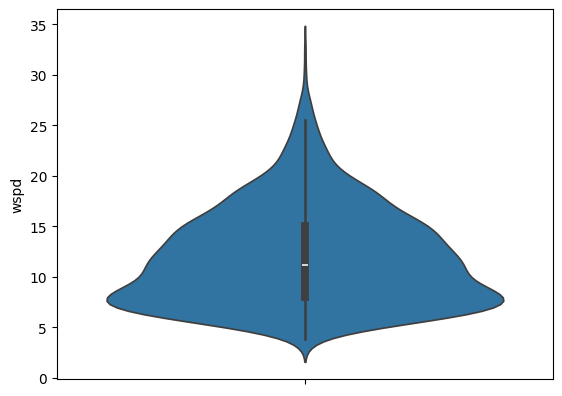

In [26]:
sns.violinplot(y='wspd', data=data)

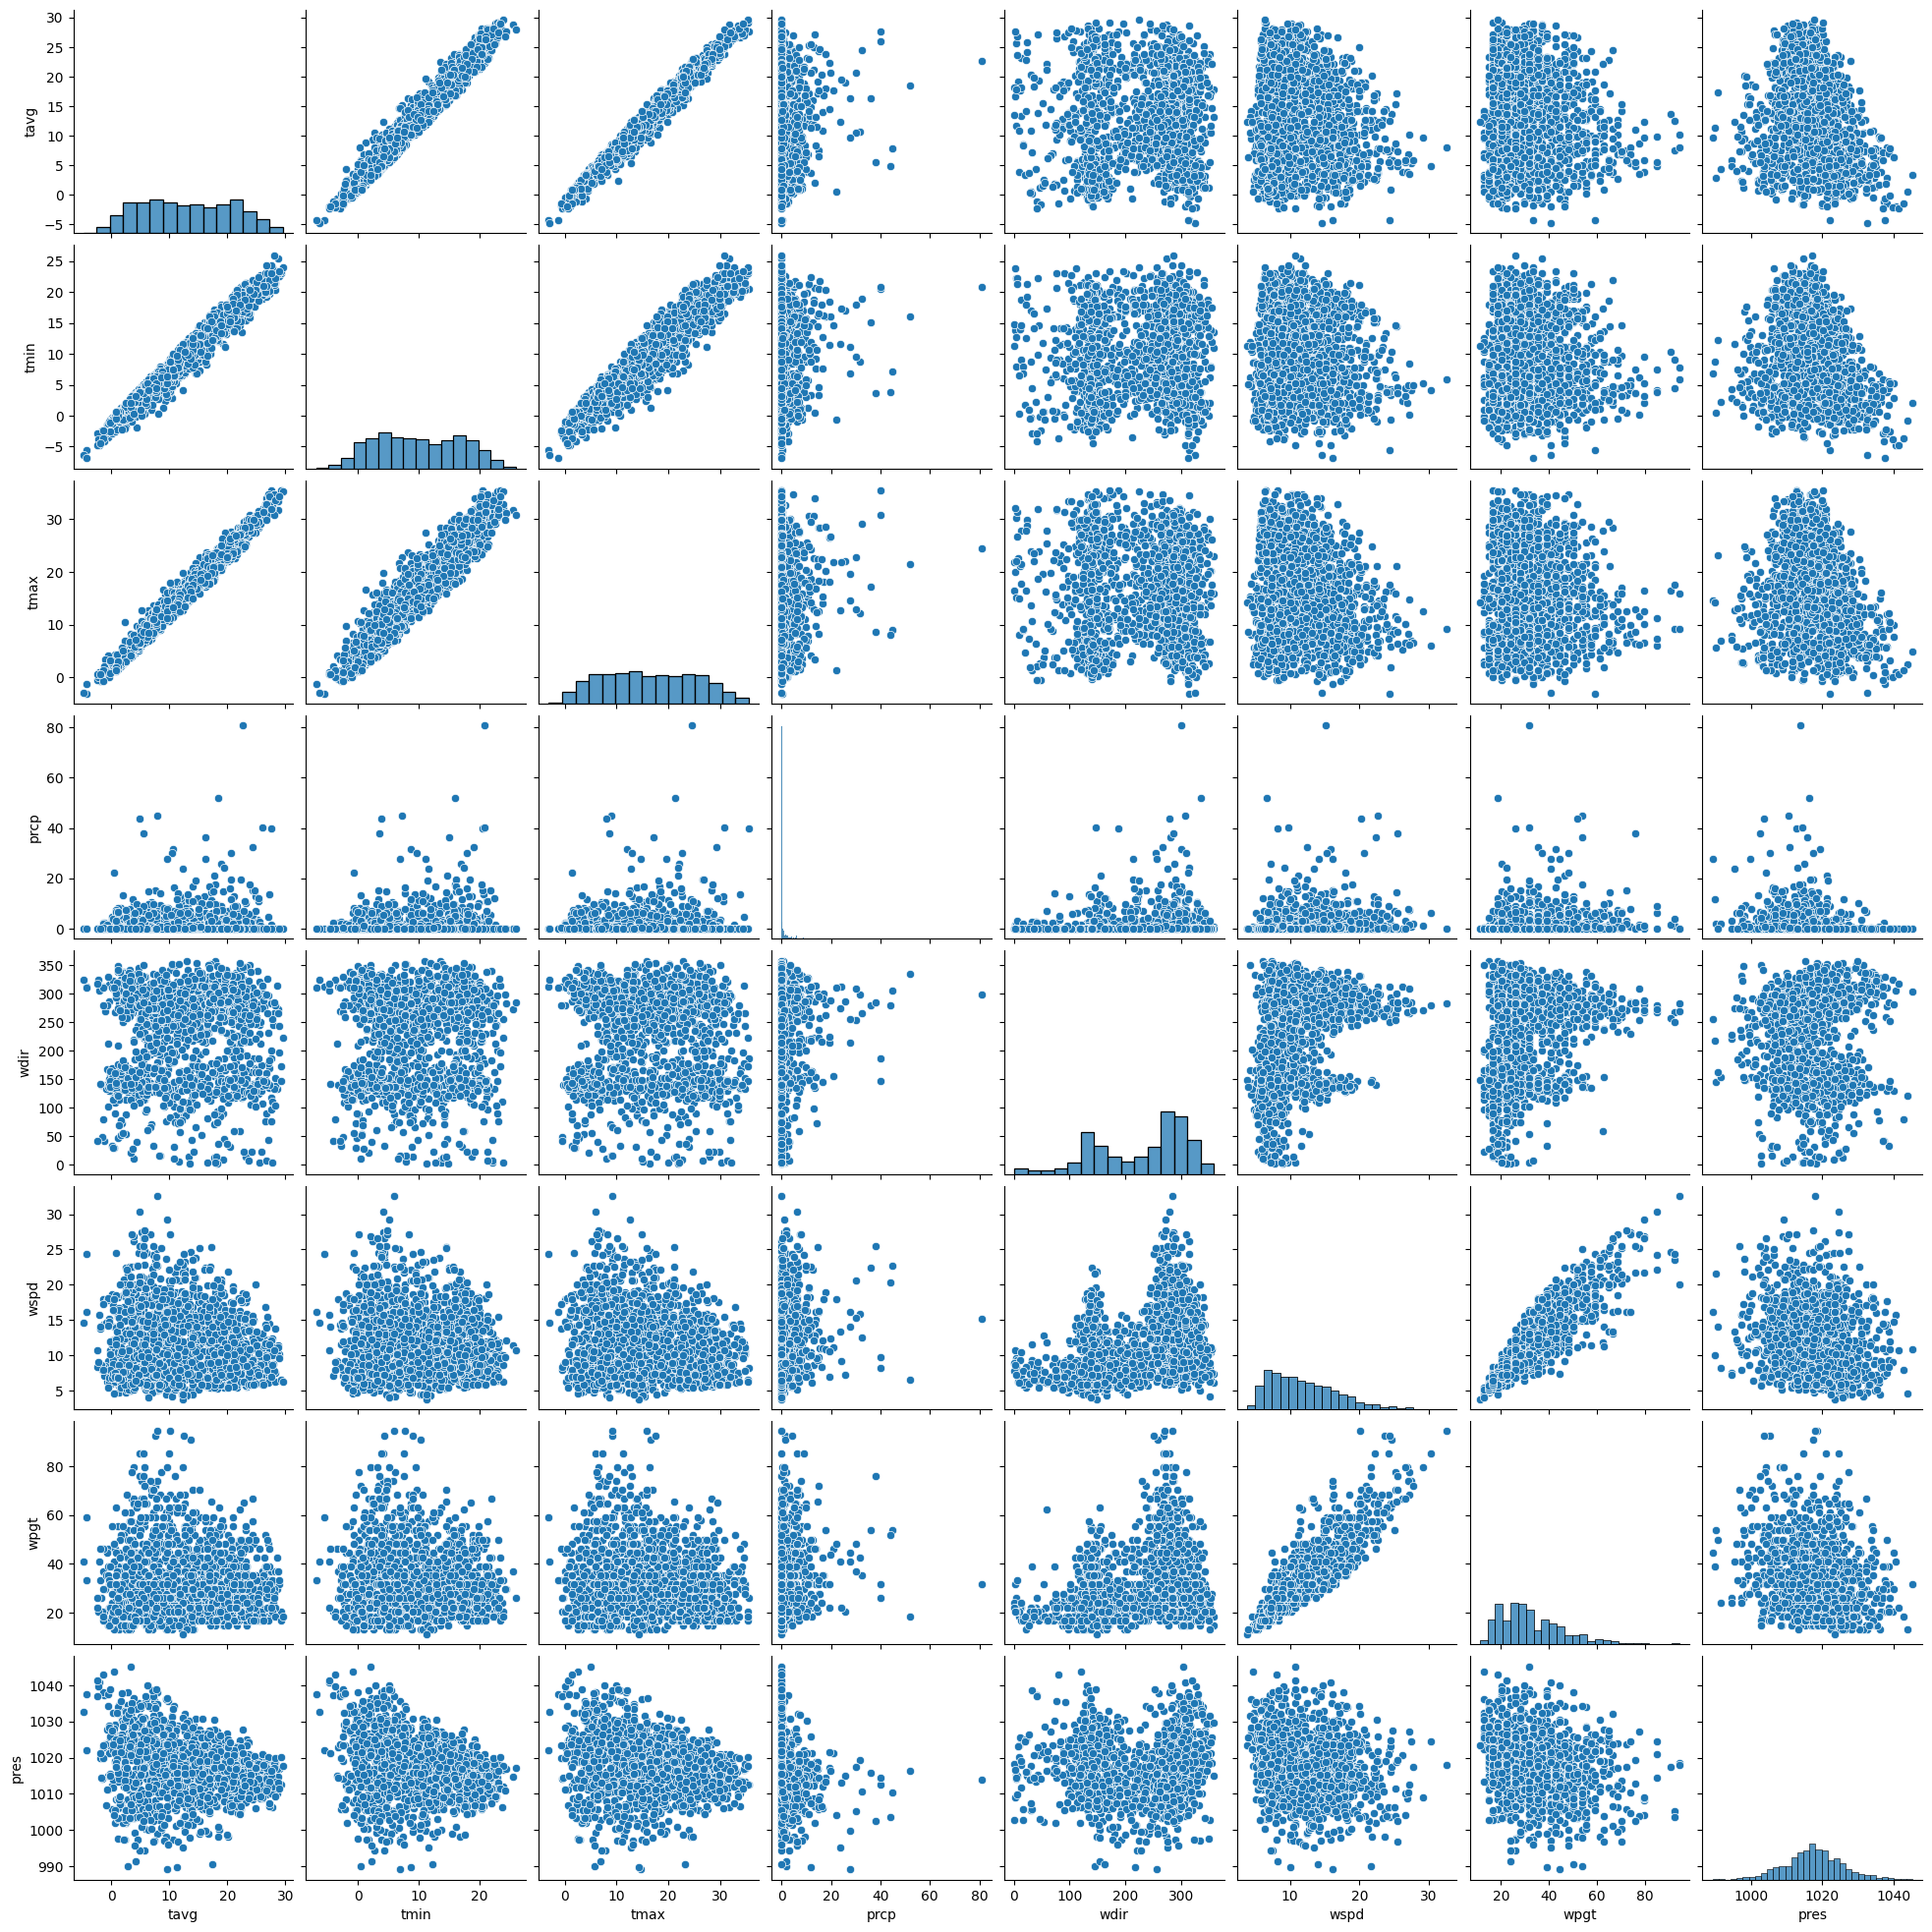

In [29]:
sns.pairplot(data=data)

<Axes: >

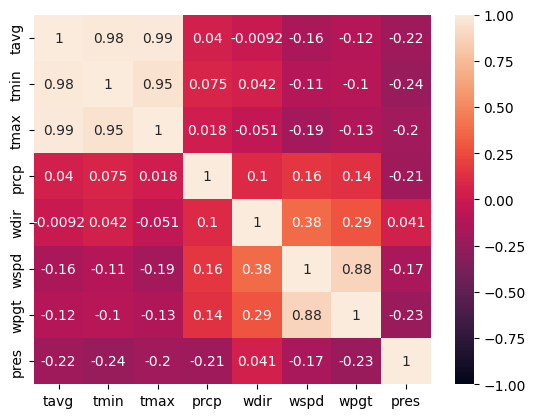

In [30]:
corr=data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

In [34]:
df=data[['tavg','prcp','wspd','wdir','pres']]
df.head()

,tavg,prcp,wspd,wdir,pres
time,,,,,
2020-01-01,4.7,0.0,10.8,293.0,1035.1
2020-01-02,1.3,0.0,4.9,142.0,1032.2
2020-01-03,-0.7,0.0,6.3,168.0,1027.9
2020-01-04,5.8,3.2,20.9,273.0,1023.7
2020-01-05,3.5,0.0,20.1,306.0,1032.2


In [33]:
df.to_csv('weather.csv')